# Week 4: Intro to Statistics and Probability

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Day 1: Descriptive Statistics
* Statistics is the science (or part of mathematics) that deals with collection, presentation and analysis of data
* Generally, statistics can be seen as consisting of two parts:
    * **Descriptive statistics**, whose goal is to collect and present the data, and provide description of the data's main features
    * **Inferential statistics**, whose goal is to provide well-founded conclusions based on the collected data, usually with the help of probability

**Note:** the term *data* can be either plural or singular, so you could say "data is" or "data are". If you use *data* as plural, then the singular is *datum*

### Basic concepts
* Data is usually structured in **data sets**. Frequently the data sets take the form of tables, or in our case -- Pandas DataFrames
* The rows of the data sets are called **instances** or **observations**
* The columns of the data sets contain the **features** or **feature vectors** or **variables** of the set
* Let's load the *titaninc.csv* and see its structure

In [2]:
# Load the set
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,ID,Survived,Class,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [3]:
# Count instances and features
print(f'There are {df_titanic.shape[0]} instances and {df_titanic.shape[1]} features')

# Get the features
print(df_titanic.columns)

There are 891 instances and 8 features
Index(['ID', 'Survived', 'Class', 'Name', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')


In [4]:
# Get info about the number of instances per feature, and their type
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        891 non-null    int64  
 1   Survived  891 non-null    int64  
 2   Class     891 non-null    int64  
 3   Name      891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       714 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


### Types of features/variables
There are two types of features:
* **Categorical**: labels or names used to identify an attribute of each element. Possibly we can compare different cateogries by ordering, but there is somewhat limited number of available statistical analyses
* **Numerical** or **quantitative**: data that indicate *how many* or *how much*. These come in two "flavors"
    * **Discrete** if measuring how many (think: *counting*)
    * **Continuous** if measuring how much (think: *measuring*)

In the Titanic data set:
* Categorical features are: *Survived*, *Class* (these two are **coded**), *Name*, *Sex*, and *Embarked*
* Numerical features are: *ID* (not of much use), *Age*, and *Fare*

### Summarizing Categorical Data
Data can be summarized in tables or through visual representations

* Tabular summaries for categorical data include:
    * Frequency distribution
    * Relative/Percent Frequency distribution
* Visual summaries for categorical data include:
    * Bar/Column graph
    * Pie chart

### Example 1
* Construct the frequency distribution for the feature *Survived* and display it on a bar graph and on a pie chart.

,Survived,Count
0,0,549
1,1,342


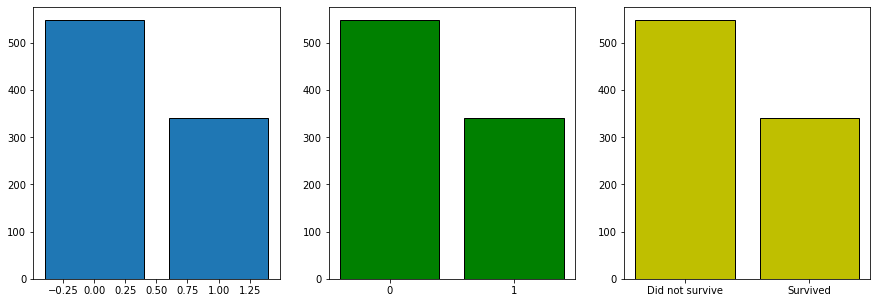

In [5]:
surv_freq = df_titanic.groupby(by='Survived').count()['ID'].reset_index()
surv_freq.columns = ['Survived', 'Count']
display(surv_freq)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(surv_freq['Survived'], surv_freq['Count'], edgecolor='k')

plt.subplot(1, 3, 2)
plt.bar(['0', '1'], surv_freq['Count'], color='g', edgecolor='k')

plt.subplot(1, 3, 3)
plt.bar(['Did not survive', 'Survived'], surv_freq['Count'], color='y', edgecolor='k')

plt.show()
plt.close()

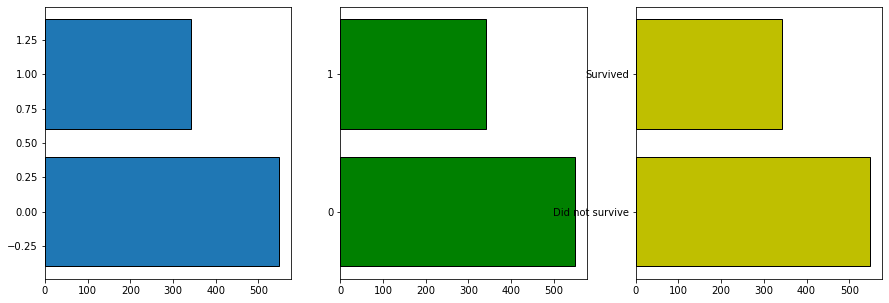

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(surv_freq['Survived'], surv_freq['Count'], edgecolor='k')

plt.subplot(1, 3, 2)
plt.barh(['0', '1'], surv_freq['Count'], color='g', edgecolor='k')

plt.subplot(1, 3, 3)
plt.barh(['Did not survive', 'Survived'], surv_freq['Count'], color='y', edgecolor='k')

plt.show()
plt.close()

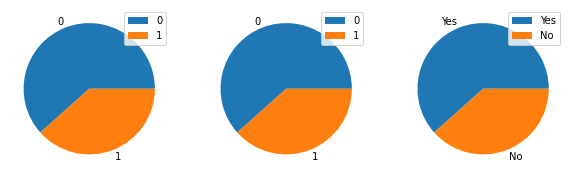

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.pie(surv_freq['Count'], labels = surv_freq['Survived'])
plt.legend()

plt.subplot(1, 3, 2)
plt.pie(x='Count', labels = 'Survived', data=surv_freq)
plt.legend()

plt.subplot(1, 3, 3)
plt.pie(surv_freq['Count'], labels = ['Yes', 'No'])
plt.legend()

plt.show()
plt.close()

<AxesSubplot:ylabel='Count'>

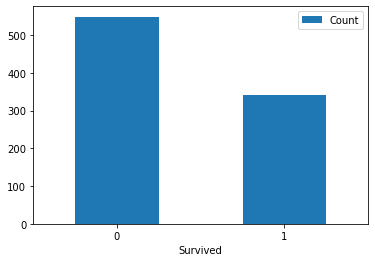

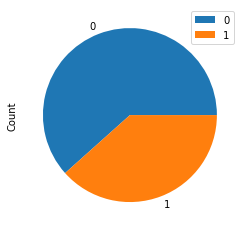

In [8]:
# Using Pandas

surv_freq.plot.bar(x='Survived', y='Count', rot=0)

surv_freq.plot.pie(y='Count')

### Example 2
* Calculate the percent frequency distribution of the feature *Embarked* and display it on a bar graph

,Embarked,Count,Prop,Perc
0,C,168,0.188976,18.9
1,Q,77,0.086614,8.7
2,S,644,0.724409,72.4


<AxesSubplot:xlabel='Embarked'>

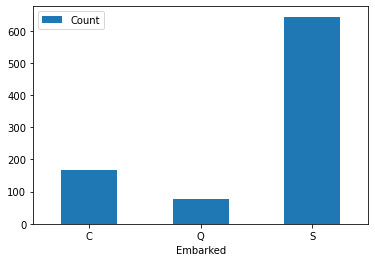

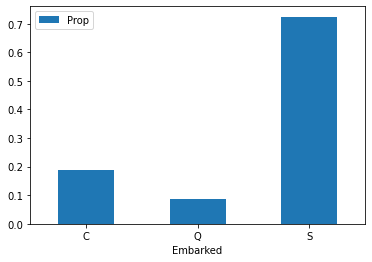

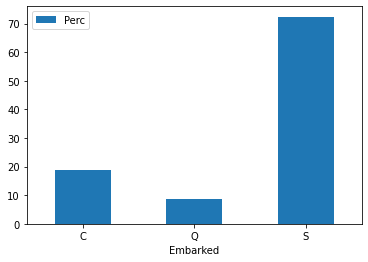

In [9]:
emb_df = df_titanic.groupby('Embarked').count()['ID'].reset_index()
emb_df.columns = ['Embarked', 'Count']

total = emb_df['Count'].sum()
emb_df['Prop'] = emb_df['Count']/total
emb_df['Perc'] = round(emb_df['Prop']*100, 1)

display(emb_df)


emb_df.plot.bar(x='Embarked', y='Count', rot=0)

emb_df.plot.bar(x='Embarked', y='Prop', rot=0)

emb_df.plot.bar(x='Embarked', y='Perc', rot=0)



### Summarizing Numerical Data
Data can be summarized in tables or through visual representations

* Tabular summaries for numerical data include:
    * Frequency distribution with classes
    * Relative/Percent Frequency distribution with classes
* Visual summaries for categorical data include:
    * Histogram
    * Box-plot

### Example 3
* Construct the frequency distribution for the feature *Age* and display it on a histogram.

In [10]:
df_age_cut = pd.Series(pd.cut(df_titanic['Age'], bins=5)).value_counts().reset_index()
df_age_cut

,index,Age
0,"(16.336, 32.252]",346
1,"(32.252, 48.168]",188
2,"(0.34, 16.336]",100
3,"(48.168, 64.084]",69
4,"(64.084, 80.0]",11


<AxesSubplot:ylabel='Frequency'>

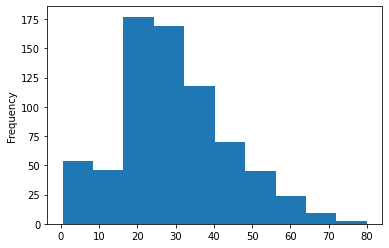

In [11]:
df_titanic['Age'].plot.hist()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

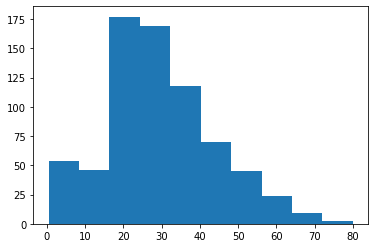

In [12]:
plt.hist(df_titanic['Age'])

### Measures of central tendency
Most frequently we wish to represent a feature with a single number. There are several options for this:
* **Mean**: the average of the data. The mean is heavily influenced by outliers/extreme values
* **Median**: the middle data point in the ordered list of points. Much more resistent to extreme values comared to the mean. Note that the median splits the data set in (roughly) 50%-50% ratio
* **Mode**: the most frequent data point in the feature. Not unique, and usually not suited for numerical variables

### Example 4
* Calculate the mean and median age of the passenger aboard the *Titanic*. Then calculate the mean and median fare rates.

The mean age is 29.69911764705882, while the median age is 28.0
The mean fare is 32.204207968574636, while the median fare is 14.4542


<AxesSubplot:ylabel='Frequency'>

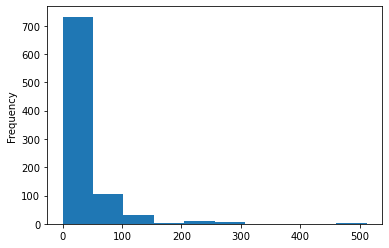

In [13]:
# Age
mean_age = df_titanic['Age'].mean()
median_age = df_titanic['Age'].median()

print(f'The mean age is {mean_age}, while the median age is {median_age}')


# Fare
mean_fare = df_titanic['Fare'].mean()
median_fare = df_titanic['Fare'].median()

print(f'The mean fare is {mean_fare}, while the median fare is {median_fare}')
df_titanic['Fare'].plot.hist()

### Measures of variability
When analyzing numerical data it is always a good habit to include information about the "diversity" of the data. This "diversity" in statistics is known as **variability**. There are many measures of variability; we single out the following:
* **Range**: just the distance between the min and the max of the feature values. Heavily influenced by extreme values. Captures 100% of the data
* **Variance**: the mean square deviation of the data from the mean. Mostly deffers to the standard deviation
* **Standar Deviation**: the square root of the variance. Probably hhe golden standard. Great to use alongside the mean
* **Interquartile Range (IQR)**: captures the *middle* 50% of the data. Great to use alongside the median

### Example 5
* Calculate the measures of variability of *Age* for the Titanic data set.

In [14]:
# Simplest way to get many of these:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
# Calculating
age = df_titanic['Age']

# getting the range
min_age = age.min()
max_age = age.max()
range_age = max_age - min_age
print('Range = ', range_age)

# Getting the variance
var_age = age.var()
print('Variance = ', var_age)

# Getting the standard deviation
stdev_age = age.std()
print('St. Dev = ', stdev_age)

# Getting the IQR
Q1_age = np.percentile(age, 25)
Q3_age = np.percentile(age, 75)
IQR_age = Q3_age - Q1_age
print('IQR = ', IQR_age)

Range =  79.58
Variance =  211.01912474630802
St. Dev =  14.526497332334042
IQR =  nan


This is the five nmber summary for AGE:
min =  0.42
Q1 =  nan
Median =  28.0
Q3 =  nan
max =  80.0


<AxesSubplot:>

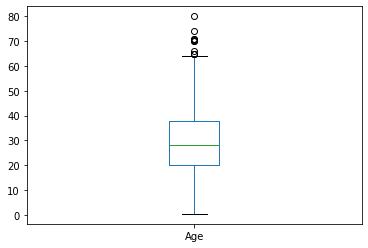

In [16]:
# Visualizing using quartiles: the box plot
median_age = age.median()

print('This is the five nmber summary for AGE:')
print('min = ', min_age)
print('Q1 = ', Q1_age)
print('Median = ', median_age)
print('Q3 = ', Q3_age)
print('max = ', max_age)

age.plot.box()

### Measuring departure from symmetricity
* The distribution of the fares is *skewed to the right* or *positively skewed* -- it has a tail dragging onto the right
* Many statistical procedures are tailored to work with data that is **symmetric**, i.e. data that has balanced tails
* The **skewness** coefficient quantifies the departure from symmetricity
* Positive values of the coefficient indicate skewness to the right. Negative values of the coefficient indicate skewness to the left. The greater the number (in terms of absolute value), the greater the skewness.

### Example 6
* Calculate the skewness of the *Age* and *Fare* features in the Titanic data set.

In [17]:
import scipy.stats as stat
skew_age = stat.skew(df_titanic['Age'].dropna())

skew_fare = stat.skew(df_titanic['Fare'])

print('The skewness of age is ', skew_age)

print('The skewness of fare is ', skew_fare)

The skewness of age is  0.3882898514698657
The skewness of fare is  4.7792532923723545


In [18]:
df_titanic[['Age', 'Fare']].skew()

Age     0.389108
Fare    4.787317
dtype: float64

### Detecting outliers
* **Outliers** (extreme points, influential points) are elements of the data set that severely depart from *most of the data*
* Generally, these should be handeled somehow before modeling
* Options include dropping the outliers or transforming the original data
* One way to detect outliers is to use **standardization** -- measure how many standard deviations from the mean is each data point. For every data point $x$ we calculate a $z$-score using the formula:
\begin{equation} z = \frac{x - \mu}{\sigma} \end{equation}
where $\mu$ is the mean and $\sigma$ is the standard deviation of the data
* A point is labeled as an outlier if $|z| \geqslant 3$

### Example 7
* List the outliers in the *Fare* feature of the Titanic data set using standardization

In [19]:
fare = pd.DataFrame(df_titanic['Fare'])
mu = fare.mean()
sigma = fare.std()

z_fare = (fare - mu)/sigma
fare['z_score'] = z_fare
fare['Outlier'] = abs(z_fare) > 3
fare.loc[fare['Outlier']==True]

,Fare,z_score,Outlier
27,263.0000,4.644393,True
88,263.0000,4.644393,True
118,247.5208,4.332899,True
258,512.3292,9.661740,True
299,247.5208,4.332899,True
311,262.3750,4.631815,True
341,263.0000,4.644393,True
377,211.5000,3.608038,True
380,227.5250,3.930516,True
438,263.0000,4.644393,True


* Another way to detect outliers is by using the quartiles $Q_1$ and $Q_3$, and the IQR. This is done by defining appropriate upper and lower boundaries of an interval of values.
* Data outside this interval are labeled as outlers.
* This is known as the $1.5\times IQR$ rule. The boundaries are:
\begin{equation}
\begin{array}{rcl}
L &=& Q_1 - 1.5 \cdot IQR\\
U &=& Q_3 + 1.5 \cdot IQR
\end{array}
\end{equation}
* Data outside the interval $[L, U]$ are labeled as outliers.

### Example 8
* List the outliers in the *Fare* feature of the Titanic data set using the $1.5\times IQR$ rule

In [20]:
fare = df_titanic['Fare']

Q1 = np.percentile(fare, 25)
Q3 = np.percentile(fare, 75)
IQR = Q3 - Q1

L = Q1 - 1.5*IQR
U = Q3 + 1.5*IQR

fare = pd.DataFrame(fare)
fare['Outlier'] = ((fare['Fare'] < L) | (fare['Fare'] > U))
fare.loc[fare['Outlier']==True]

,Fare,Outlier
1,71.2833,True
27,263.0000,True
31,146.5208,True
34,82.1708,True
52,76.7292,True
...,...,...
846,69.5500,True
849,89.1042,True
856,164.8667,True
863,69.5500,True


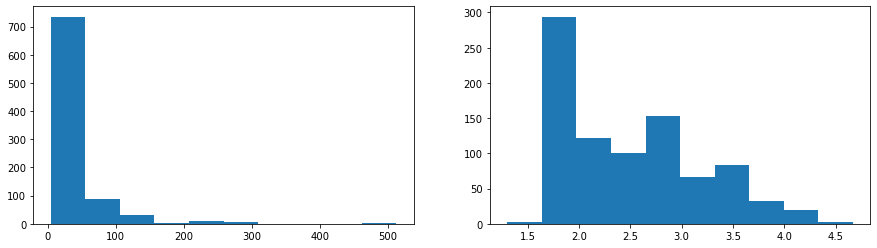

In [45]:
fare = df_titanic.loc[df_titanic['Fare'] > 0]['Fare']
#fare.plot(kind='hist')
L = -0.097787
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.hist(fare)

plt.subplot(1,2,2)
plt.hist((fare**L - 1)/L)
plt.show()

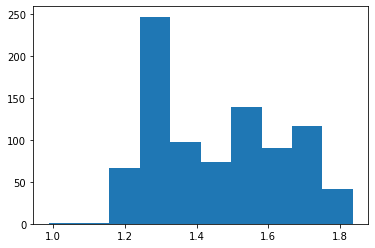

In [46]:
#Box-Cox Transformation
#y = (x**lmbda - 1) / lmbda,  for lmbda != 0
#    log(x),                  for lmbda = 0

fare_transformed = stat.boxcox(fare)
plt.figure()
plt.hist(fare_transformed[0])
plt.show()

In [60]:
fare = df_titanic['Fare']
fare_transformed = stat.boxcox(fare)
plt.figure()
plt.hist(fare_transformed[0])
plt.show()
fare_transformed[1]

ValueError: Data must be positive.

<AxesSubplot:ylabel='Frequency'>

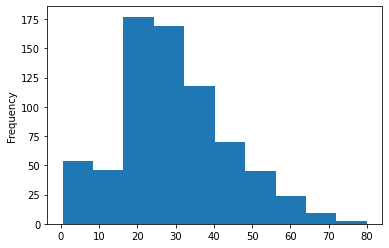

In [54]:
age = df_titanic['Age'].dropna()
age.plot(kind='hist')

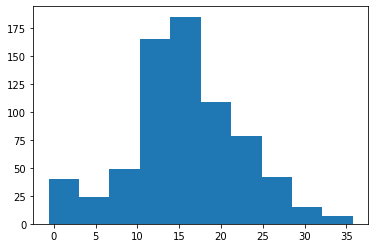

0.7627890912077443

In [59]:
age_transformed = stat.boxcox(age)
plt.figure()
plt.hist(age_transformed[0])
plt.show()
age_transformed[1]